# Data Exploration 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import transformers

In [2]:
##### Loading data
data = pd.read_csv('data_short.csv')
bias_labels = pd.read_csv('bias_labels.csv', index_col='Source')

source_list = data['source']
content_list = data['content']

In [3]:
##### Contents that include name of source
source_in_content = []
counter = 0
for source,content in zip(source_list,content_list):
    if source in content:
        counter += 1
        source_in_content.append(source)
        # if source not in source_in_content:
        #     source_in_content.append(source)

In [5]:
# Get counts of sources that are mentioned in own contents
source_in_content_sources, source_in_content_count = np.unique(source_in_content, return_counts=True)
source_in_content_sources_df = pd.DataFrame({'source in content count': source_in_content_count}, index=source_in_content_sources)
# Get count of each source 
total_sources, total_sources_count = np.unique(source_list, return_counts=True)
# Create dataframe with sources, total counts, total share, source in content count, 
# share of source in content, and bias label
source_statistics = pd.DataFrame({'source': total_sources, 'total count': total_sources_count}, index=total_sources)
source_statistics['total share'] = source_statistics['total count']/np.sum(source_statistics['total count'])
source_statistics = pd.concat([source_statistics, source_in_content_sources_df], axis=1, sort=True)
source_statistics.fillna(0,inplace=True)
source_statistics['share source in content'] = source_statistics['source in content count']/source_statistics['total count']
source_statistics = pd.concat([source_statistics, bias_labels], axis=1, sort=True)

In [ ]:
# To see all outlets
pd.set_option("display.max_rows",80)

In [40]:
source_statistics

,source,total count,total share,source in content count,share source in content,bias
Addicting Info,Addicting Info,429,0.001479,1.0,0.002331,left
Al Jazeera,Al Jazeera,3760,0.012964,1559.0,0.414628,center
Alternet,Alternet,4720,0.016274,1.0,0.000212,left
BBC,BBC,13818,0.047642,4990.0,0.361123,center
Bearing Arms,Bearing Arms,1193,0.004113,50.0,0.041911,right
Bipartisan Report,Bipartisan Report,4050,0.013964,2.0,0.000494,left
Breitbart,Breitbart,1856,0.006399,562.0,0.302802,right
Business Insider,Business Insider,432,0.001489,48.0,0.111111,center
CNBC,CNBC,2384,0.008220,707.0,0.296560,center
CNN,CNN,8143,0.028076,5682.0,0.697777,left


<BarContainer object of 80 artists>

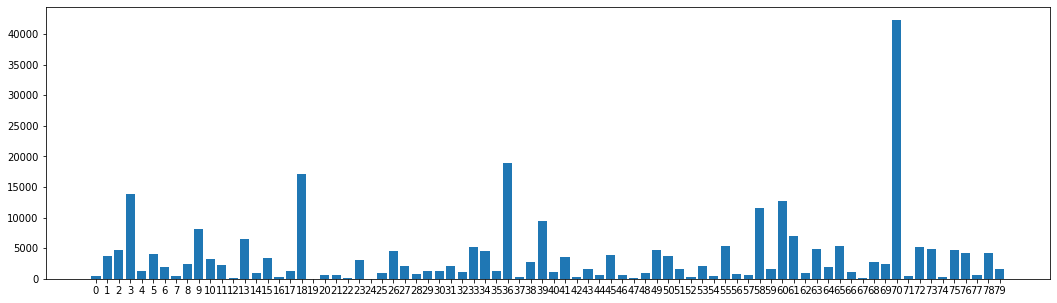

In [20]:
fig = plt.figure(1, [18,5])
ax = plt.axes(xticks=list(range(len(source_statistics))))

plt.bar(list(range(len(source_statistics))), source_statistics['total count'])


In [43]:
source_statistics['source'][39]

'Newsweek'